# Загрузка и анализ данных

In [ ]:
!pip install -q -U scikit-learn
!pip install -q -U aiogram
!pip install -q typing-extensions==4.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which i

In [ ]:
!pip install -q -U wldhx.yadisk-direct nltk pandarallel pymorphy2 pandas
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
import joblib
from collections import Counter

nltk.download('stopwords')
from pandarallel import pandarallel
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
pd.set_option('max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy.sparse import hstack
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('final_dataset.csv' )

In [ ]:
df.sample(1)

,title,text,topic,date
274337,Организаторы митингов в Приморье отвергли обвинения в финансировании из-за рубежа,"Общество ТИГР (""Товарищество инициативных граждан России"") отвергло обвинения в использовании иностранных грантов при организации акций протеста автомобилистов в Приморье. Об этом 19 марта сообщает агентство ""Интерфакс"". Члены ТИГРа направили в Госдуму письмо, в котором утверждают, что организовывали акции лишь на собственные деньги и на небольшие пожертвования заинтересованных граждан. Напомним, 18 марта Госдума поручила парламентскому комитету по безопасности выяснить источники, из которых финансировалось проведение митингов на Дальнем Востоке. Инициаторами проверки выступили депутат от фракции ""Единая Россия"" Сергей Белоконев и представитель ЛДПР Сергей Иванов. Они заявили, что увидели в СМИ информацию о выданных ТИГРу американских грантах. Движение ТИГР выступает против направленного на поддержку отечественного автопрома повышения ввозных пошлин на подержанные иномарки. Пошлины были повышены с 12 января. Жители Приморья, среди которых очень популярны подержанные японские машины, встретили нововведение массовыми акциями протеста. Митинги начались в декабре 2008 года и периодически повторяются до сих пор. 21 декабря для разгона акции владивостокских автомобилистов был вызван подмосковный ОМОН.",Россия,2009/03/19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714940 entries, 0 to 714939
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   714940 non-null  object
 1   text    714935 non-null  object
 2   topic   714940 non-null  object
 3   date    714940 non-null  object
dtypes: object(4)
memory usage: 21.8+ MB


In [ ]:
df=df[df.text.notna()]

In [ ]:
df.describe()

,title,text,topic,date
count,714935,714935,714935,714935
unique,712195,714006,11,7026
top,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,2008/12/08
freq,21,291,160442,260


In [ ]:
df['year'] = df.date.apply(lambda x: int(x.split('/')[0]))

In [ ]:
l = sorted([i for i in Counter(df['year']).items()], key=lambda x: x[0])

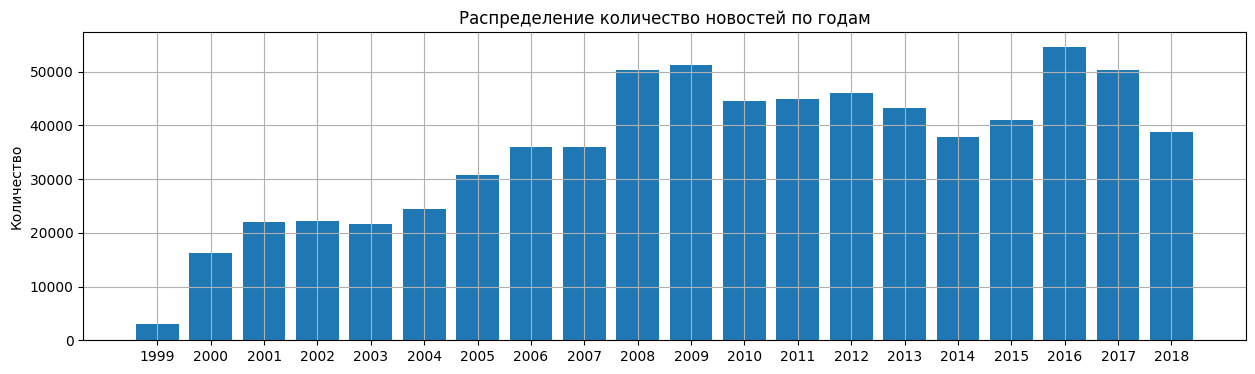

In [ ]:
plt.figure(figsize=(15,4))
year = [i[0] for i in l]
counts = [i[1] for i in l]
plt.bar(year, counts,)
plt.ylabel('Количество')
plt.title('Распределение количество новостей по годам')
plt.xticks(range(1999, 2019))
plt.grid()
plt.show()

In [ ]:
d = {}
for topic in df.topic.unique():
    cnt = Counter(df.loc[df.topic==topic, 'year'])
    d[topic] = np.array([cnt[k] for k in range(1999, 2019)])

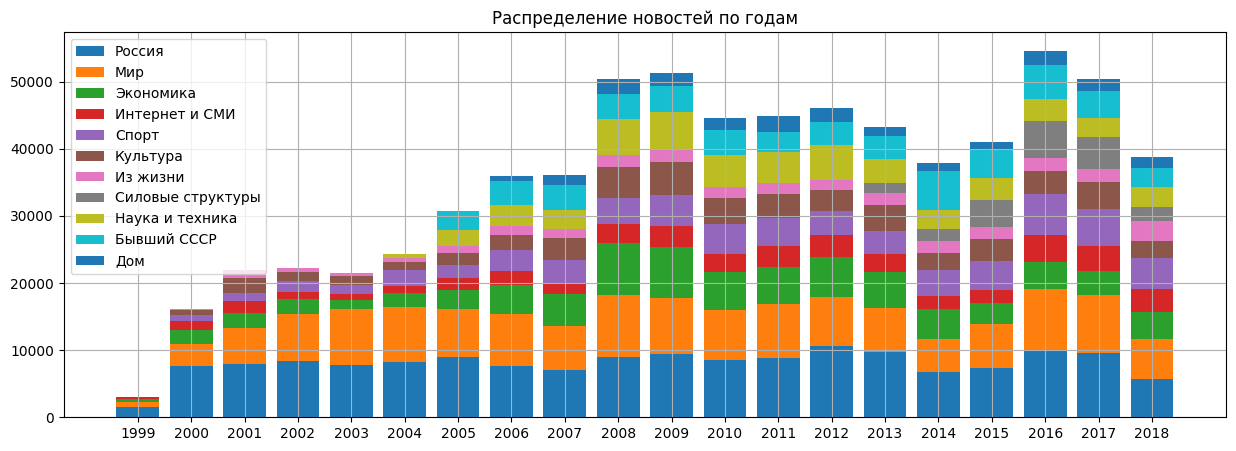

In [ ]:
species = list(range(1999, 2019))
weight_counts = d
width = 0.8
fig, ax = plt.subplots(figsize=(15,5))
bottom = np.zeros(20)
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Распределение новостей по годам")
ax.legend()
ax.set_xticks(range(1999, 2019))
plt.grid()
plt.show()

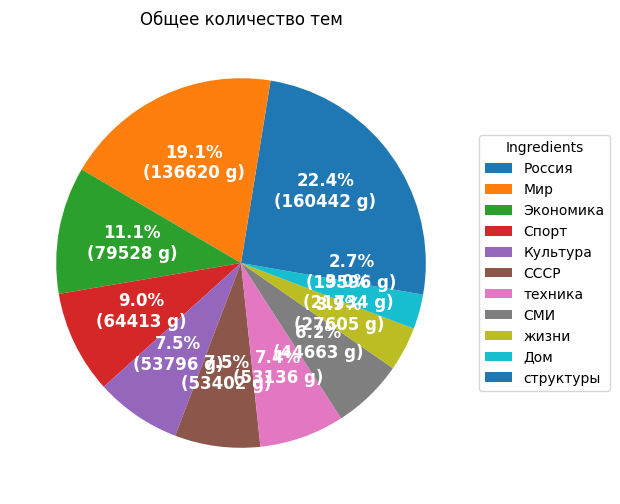

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(aspect="equal"))

recipe = [f'{i[1]} {i[0]}' for i in list(df.topic.value_counts().items())]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Общее количество тем")

plt.show()

In [ ]:
df['date'] = df.date.apply(lambda x: pd.to_datetime(x.replace('/','-')))

In [ ]:
df['date'].max()

Timestamp('2018-12-15 00:00:00')

In [ ]:
df['date'].min()

Timestamp('1999-08-31 00:00:00')

In [ ]:
data = Counter(df['date'])

In [ ]:
# @title Текст заголовка по умолчанию
%%writefile calplot.py
import calendar
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

from matplotlib.colors import ColorConverter, ListedColormap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def yearplot(data, year=None, how='sum',
             vmin=None, vmax=None,
             cmap='viridis', fillcolor='whitesmoke',
             linewidth=1, linecolor=None, edgecolor='gray',
             daylabels=calendar.day_abbr[:], dayticks=True,
             dropzero=None,
             textformat=None, textfiller='', textcolor='black',
             monthlabels=calendar.month_abbr[1:], monthlabeloffset=15,
             monthticks=True,
             ax=None, **kwargs):
    """
    Plot one year from a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    year : integer
        Only data indexed by this year will be plotted. If `None`, the first
        year for which there is data will be plotted.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    vmin, vmax : floats
        Values to anchor the colormap. If `None`, min and max are used after
        resampling data by day.
    cmap : matplotlib colormap name or object
        The mapping from data values to color space.
    fillcolor : matplotlib color
        Color to use for days without data.
    linewidth : float
        Width of the lines that will divide each day.
    linecolor : color
        Color of the lines that will divide each day. If `None`, the axes
        background color is used, or 'white' if it is transparent.
    daylabels : list
        Strings to use as labels for days, must be of length 7.
    dayticks : list or int or bool
        If `True`, label all days. If `False`, don't label days. If a list,
        only label days with these indices. If an integer, label every n day.
    dropzero : bool
        If `True`, don't fill a color for days with a zero value.
    monthlabels : list
        Strings to use as labels for months, must be of length 12.
    monthlabeloffset : integer
        Day offset for labels for months to adjust horizontal alignment.
    monthticks : list or int or bool
        If `True`, label all months. If `False`, don't label months. If a
        list, only label months with these indices. If an integer, label every
        n month.
    edgecolor : color
        Color of the lines that will divide months.
    textformat : string
        Text format string for grid cell text
    textfiller : string
        Fallback text for grid cell text for cells with no data
    textcolor : color
        Color of the grid cell text
    ax : matplotlib Axes
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to matplotlib `ax.pcolormesh`.

    Returns
    -------
    ax : matplotlib Axes
        Axes object with the calendar heatmap.

    """

    if year is None:
        year = data.index.sort_values()[0].year

    if how is None:
        # Assume already sampled by day.
        by_day = data
    else:
        # Sample by day.
        by_day = data.resample('D').agg(how)

    # Default to dropping zero values for a series with over 50% of rows being zero.
    if not (dropzero is False) and (by_day[by_day == 0].count() > 0.5 * by_day.count()):
        dropzero = True

    if dropzero:
        by_day = by_day.replace({0: np.nan}).dropna()

    # Min and max per day.
    if vmin is None:
        vmin = by_day.min()
    if vmax is None:
        vmax = by_day.max()

    if ax is None:
        ax = plt.gca()

    if linecolor is None:
        # Unfortunately, linecolor cannot be transparent, as it is drawn on
        # top of the heatmap cells. Therefore it is only possible to mimic
        # transparent lines by setting them to the axes background color. This
        # of course won't work when the axes itself has a transparent
        # background so in that case we default to white which will usually be
        # the figure or canvas background color.
        linecolor = ax.get_facecolor()
        if ColorConverter().to_rgba(linecolor)[-1] == 0:
            linecolor = 'white'

    # Filter on year.
    try:
      # could be empty due to `dropzero`
      by_day = by_day[str(year)]
    except KeyError:
      pass

    # Add missing days.
    by_day = by_day.reindex(
        pd.date_range(start=str(year), end=str(year + 1),
                      freq='D', tz=by_day.index.tzinfo)[:-1])

    # Create data frame we can pivot later.
    by_day = pd.DataFrame({'data': by_day,
                           'fill': 1,
                           'day': by_day.index.dayofweek,
                           'week': by_day.index.isocalendar().week})

    # There may be some days assigned to previous year's last week or
    # next year's first week. We create new week numbers for them so
    # the ordering stays intact and week/day pairs unique.
    by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
    by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
        = by_day.week.max() + 1

    # Pivot data on day and week and mask NaN days.
    plot_data = by_day.pivot(index='day', columns='week', values='data').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Do the same for all days of the year, not just those we have data for.
    fill_data = by_day.pivot(index='day', columns='week', values='fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Draw heatmap for all days of the year with fill color.
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

    # Draw heatmap.
    kwargs['linewidth'] = linewidth
    kwargs['edgecolors'] = linecolor
    ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)

    # Limit heatmap to our data.
    ax.set(xlim=(0, plot_data.shape[1]), ylim=(0, plot_data.shape[0]))

    # Square cells.
    ax.set_aspect('equal')

    # Remove spines and ticks.
    for side in ('top', 'right', 'left', 'bottom'):
        ax.spines[side].set_visible(False)
    for axis in (ax.xaxis, ax.yaxis):
        axis.set_tick_params(which='both', length=0)

    # Get indices for monthlabels.
    if monthticks is True:
        monthticks = range(len(monthlabels))
    elif monthticks is False:
        monthticks = []

    # Get indices for daylabels.
    if dayticks is True:
        dayticks = range(len(daylabels))
    elif dayticks is False:
        dayticks = []

    ax.set_xlabel('')
    ax.set_xticks([by_day.loc[pd.Timestamp(
                   datetime.date(year, i + 1, monthlabeloffset))].week
                   for i in monthticks])
    ax.set_xticklabels([monthlabels[i] for i in monthticks])

    ax.set_ylabel('')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([6 - i + 0.5 for i in dayticks])
    ax.set_yticklabels([daylabels[i] for i in dayticks], rotation='horizontal',
                       va='center')

    # Text in mesh grid if format is specified.
    if textformat is not None:
        for y in range(plot_data.shape[0]):
            for x in range(plot_data.shape[1]):
                content = ''
                masked = plot_data[y, x]
                if masked is np.ma.masked:
                    if fill_data[y, x] == 1:
                        content = textfiller
                else:
                    content = textformat.format(masked)
                ax.text(x + 0.5, y + 0.5, content, color=textcolor,
                         ha='center', va='center')

    # Month borders code credited to https://github.com/rougier/calendar-heatmap
    xticks = []
    start = datetime.datetime(year, 1, 1).weekday()
    for month in range(1, 13):
        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = 7 - first.weekday()
        y1 = 7 - last.weekday()
        x0 = (int(first.strftime('%j'))+start-1)//7
        x1 = (int(last.strftime('%j'))+start-1)//7
        P = [(x0, y0),
             (x0+1, y0),
             (x0+1, 7),
             (x1+1, 7),
             (x1+1, y1-1),
             (x1, y1-1),
             (x1, 0),
             (x0, 0) ]
        xticks.append(x0 + (x1-x0+1)/2)
        poly = Polygon(P, edgecolor=edgecolor, facecolor='None',
                       linewidth=linewidth, zorder=20, clip_on=False)
        ax.add_artist(poly)

    return ax


def calplot(data, how='sum',
            yearlabels=True, yearascending=True,
            yearlabel_kws=None, subplot_kws=None, gridspec_kws=None,
            figsize=None, fig_kws=None, colorbar=None,
            suptitle=None, suptitle_kws=None,
            tight_layout=True, **kwargs):
    """
    Plot a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    figsize : (float, float)
        Size of figure for the plot.
    suptitle : string
        Title for the plot.
    yearlabels : bool
       Whether or not to draw the year label for each subplot.
    yearascending : bool
       Sort the calendar in ascending or descending order.
    yearlabel_kws : dict
       Keyword arguments passed to the matplotlib `set_ylabel` call which is
       used to draw the year for each subplot.
    subplot_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    gridspec_kws : dict
        Keyword arguments passed to the matplotlib `GridSpec` constructor used
        to create the grid the subplots are placed on.
    fig_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    suptitle_kws : dict
        Keyword arguments passed to the matplotlib `suptitle` call.
    kwargs : other keyword arguments
        All other keyword arguments are passed to `yearplot`.

    Returns
    -------
    fig, axes : matplotlib Figure and Axes
        Tuple where `fig` is the matplotlib Figure object `axes` is an array
        of matplotlib Axes objects with the calendar heatmaps, one per year.

    """

    if yearlabel_kws is None:
        yearlabel_kws = dict()
    if subplot_kws is None:
        subplot_kws = dict()
    if gridspec_kws is None:
        gridspec_kws = dict()
    if fig_kws is None:
        fig_kws = dict()
    if suptitle_kws is None:
        suptitle_kws = dict()

    years = np.unique(data.index.year)
    if not yearascending:
        years = years[::-1]

    if colorbar is None:
        colorbar = data.nunique() > 1

    if figsize is None:
        figsize = (10+(colorbar*2.5), 1.7*len(years))

    fig, axes = plt.subplots(nrows=len(years), ncols=1, squeeze=False,
                             figsize=figsize,
                             subplot_kw=subplot_kws,
                             gridspec_kw=gridspec_kws, **fig_kws)
    axes = axes.T[0]

    # We explicitely resample by day only once. This is an optimization.
    by_day = data
    if how is not None:
        by_day = by_day.resample('D').agg(how)

    ylabel_kws = dict(
        fontsize=30,
        color='gray',
        fontweight='bold',
        ha='center')
    ylabel_kws.update(yearlabel_kws)

    max_weeks = 0

    for year, ax in zip(years, axes):
        yearplot(by_day, year=year, how=None, ax=ax, **kwargs)
        max_weeks = max(max_weeks, ax.get_xlim()[1])

        if yearlabels:
            ax.set_ylabel(str(year), **ylabel_kws)

    # In a leap year it might happen that we have 54 weeks (e.g., 2012).
    # Here we make sure the width is consistent over all years.
    for ax in axes:
        ax.set_xlim(0, max_weeks)

    stitle_kws = dict()

    if tight_layout:
        plt.tight_layout()
        stitle_kws.update({'y': 1})

    if colorbar:
        if tight_layout:
            stitle_kws.update({'x': 0.425, 'y': 1.03})

        if len(years) == 1:
            fig.colorbar(axes[0].get_children()[1], ax=axes.ravel().tolist(),
                         orientation='vertical')
        else:
            fig.subplots_adjust(right=0.8)
            cax = fig.add_axes([0.85, 0.025, 0.02, 0.95])
            fig.colorbar(axes[0].get_children()[1], cax=cax, orientation='vertical')

    stitle_kws.update(suptitle_kws)
    plt.suptitle(suptitle, **stitle_kws)

    return fig, axes

Writing calplot.py


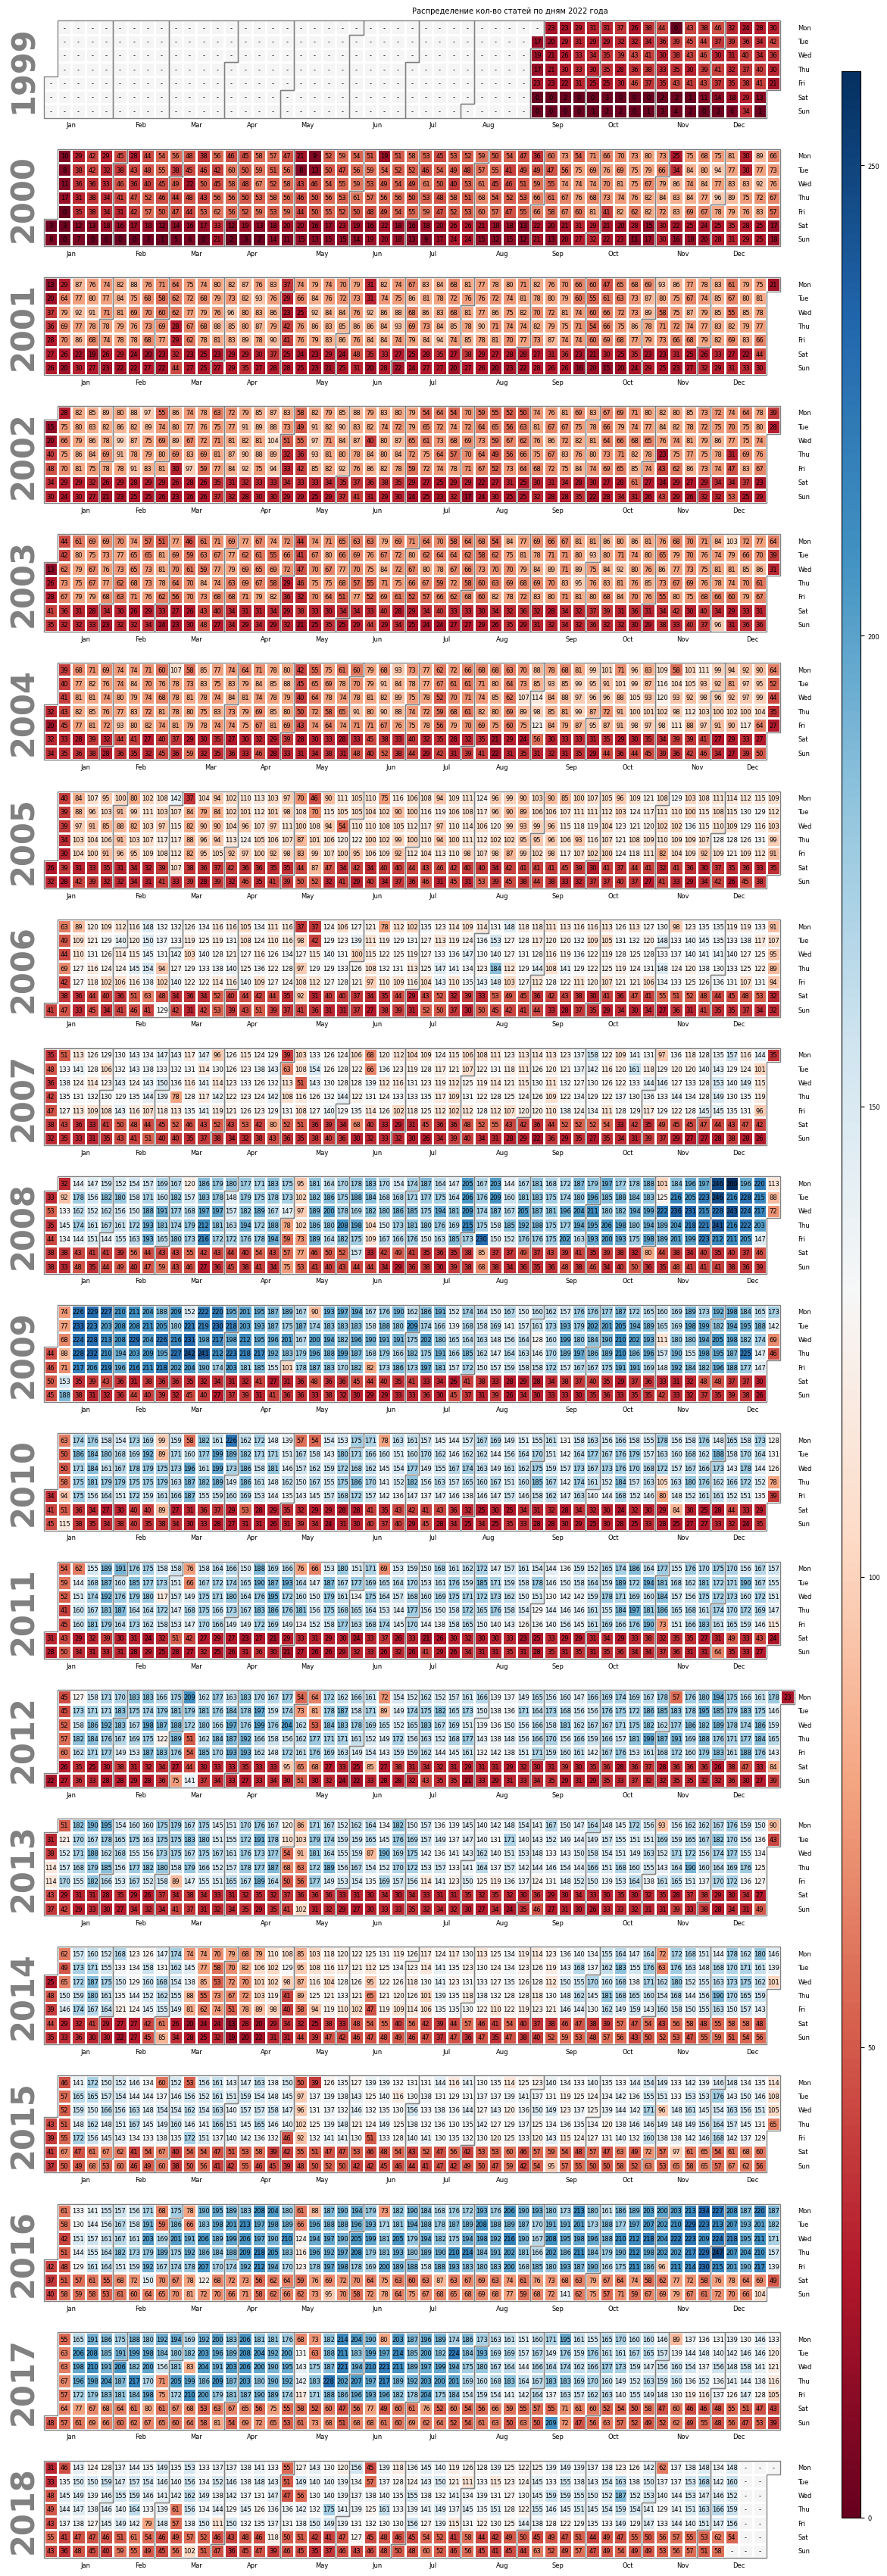

In [ ]:
import calplot
days = pd.date_range('1999-08-31', '2018-12-15')
values = pd.Series([data[i] if data.get(i) else 0 for i in days], index = days)
plt.rcParams.update({'font.size': 6})

# warnings.filterwarnings('ignore')
calplot.calplot(values,
                suptitle = 'Распределение кол-во статей по дням 2022 года',
                suptitle_kws = {'x': 0.5, 'y': 1.0}, cmap = 'RdBu',
                textformat = '{:.0f}', textfiller = '-', textcolor = 'black')

plt.show()

In [ ]:
df.sample(1 )

,title,text,topic,date,year
380694,В Таможенном союзе обнулили пошлины на томаты и яблоки,"Комиссия Таможенного союза, в который входят Россия, Казахстан и Белоруссия, приняла решение обнулить пошлины на ряд овощей и фруктов. Об этом 5 июля сообщает РИА Новости. Обнуленные пошлины будут, в частности, действовать при импорте томатов, огурцов, корнишонов и яблок. Ввозить эти товары беспошлинно можно будет только до 1 августа - потом, возможно, ставки будут пересмотрены. Ранее Таможенный союз уже обнулял пошлины на ряд овощей и фруктов - например, с апреля по июнь в Россию, Белоруссию и Казахстан можно было беспошлинно ввозить морковку, свеклу и репчатый лук. РИА Новости отмечает, что Комиссия Таможенного союза также рассматривала предложение обнулить пошлины на сухое молоко и фасованный чай, но решила этого не делать. Сейчас ввозные пошлины на яблоки, огурцы и томаты в России составляют 15 процентов от стоимости товара.",Экономика,2011-07-05,2011


# Обучение и настройка моделей

## Подготовка данных

In [ ]:
stopwords_ru = stopwords.words("russian")
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

In [ ]:
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['title'] = df['title'].progress_apply(lambda x:  ' '.join([i for i in re.sub(patterns, ' ', x.lower()).split() if i not in stopwords_ru]))

My bar!: 100%|██████████| 714935/714935 [00:17<00:00, 40938.86it/s]


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['text'] = df['text'].progress_apply(lambda x:  ' '.join([i for i in re.sub(patterns, ' ', x.lower()).split() if i not in stopwords_ru]))

My bar!: 100%|██████████| 714935/714935 [06:01<00:00, 1978.92it/s]


In [ ]:
df.to_csv('data_temp.csv', index=False)

In [ ]:
df.sample(1)

In [ ]:
title_set = []
for t in tqdm(df['title'].values, total=df['title'].values.shape[0]):
    title_set.extend(list(set(t.split())))
title_set = set(title_set)

100%|██████████| 714935/714935 [00:02<00:00, 350394.01it/s]


In [ ]:
title_result = {s: morph.normal_forms(s)[0] for s in tqdm(title_set, total=len(title_set))}

100%|██████████| 199083/199083 [00:37<00:00, 5274.18it/s]


In [ ]:
text_set = []
for ind, t in enumerate(tqdm(df['text'].values, total=df['text'].values.shape[0])):
    if ind%10000==0 and ind>0:
        text_set = list(set(text_set))
    text_set.extend(list(set(t.split())))
text_set = set(text_set)

In [ ]:
text_result = {s: morph.normal_forms(s)[0] for s in tqdm(text_set, total=len(text_set))}

100%|██████████| 1068907/1068907 [04:07<00:00, 4311.75it/s]


In [ ]:
def lemmatize(doc):
    tokens = []
    for token in doc.split():
        if title_result.get(token):
            tokens.append(title_result.get(token))
    return tokens

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['title'] = df['title'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!: 100%|██████████| 714935/714935 [00:04<00:00, 172451.28it/s]


In [ ]:
def lemmatize(doc):
    tokens = []
    for token in doc.split():
        if text_result.get(token):
            tokens.append(text_result.get(token))
    return tokens

In [ ]:
tqdm.pandas(desc='My bar!')
df['text'] = df['text'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!: 100%|██████████| 714935/714935 [01:31<00:00, 7823.29it/s]


In [ ]:
df.to_csv('data_temp.csv', index=False)
df = pd.read_csv('data_temp.csv' )

In [ ]:
# df = pd.read_csv('/content/result.csv')

In [ ]:
df = pd.read_csv('data_temp.csv' )

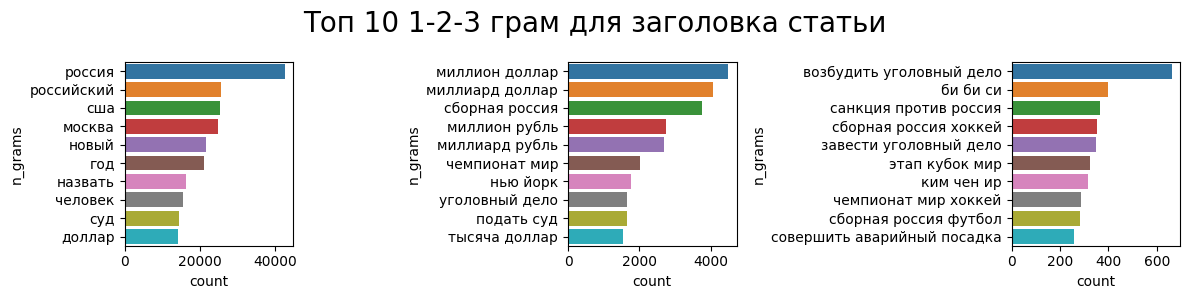

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=False)
for ind, ax in enumerate(axs):
    cn = Counter()
    for i in range(8):
        bs = 100_000
        cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
        n_grams = cv.fit_transform(df['title'].values[i * bs: (i + 1) * bs])
        data = dict(zip(cv.get_feature_names_out(), n_grams.sum(axis=0).tolist()[0]))
        cn += Counter(data)
    ngram_freq = pd.DataFrame(cn.most_common(10), columns=['n_grams','count']).sort_values('count', ascending=False)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 1-2-3 грам для заголовка статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for ind, ax in enumerate(axs):
    cn = Counter()
    for i in range(8):
        bs = 100_000
        cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
        n_grams = cv.fit_transform(df['text'].values[i * bs: (i + 1) * bs])
        data = dict(zip(cv.get_feature_names_out(), n_grams.sum(axis=0).tolist()[0]))
        cn += Counter(data)
    ngram_freq = pd.DataFrame(cn.most_common(10), columns=['n_grams', 'count']).sort_values('count', ascending=False)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 1-2-3 грам для тела статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
!pip install -U -q sklearn

In [ ]:
classes = df['topic'].unique()
def plot_n_gam(n_gram=1, col='title', title='Топ 10 слов по классам для заголовка статьи'):
    fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharey=False)
    axs = axs.flatten()
    for ind, cls in enumerate(classes):
        ax = axs[ind]
        cv = CountVectorizer(ngram_range=(n_gram, n_gram))
        n_grams = cv.fit_transform(df.loc[df['topic']==cls, col])
        data = {'count':n_grams.sum(axis=0).tolist()[0], 'n_grams': cv.get_feature_names_out()}
        ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
        ax.set_title(cls)
        sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_n_gam(n_gram=1, col='title', title='Топ 10 слов по классам для заголовка статьи')

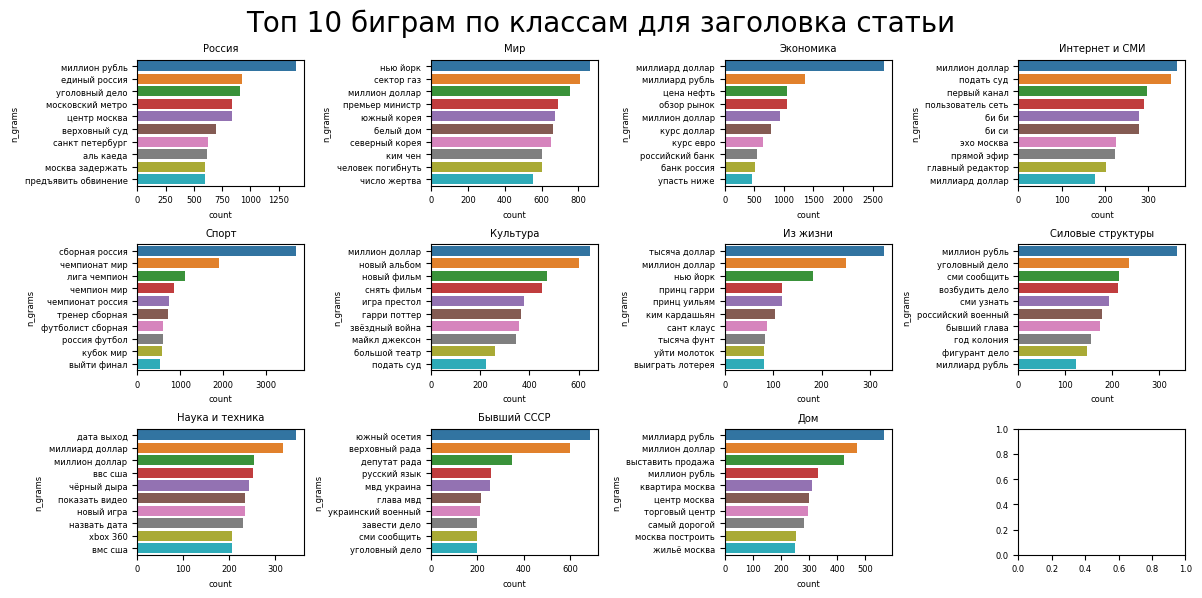

In [ ]:
plot_n_gam(n_gram=2, col='title', title='Топ 10 биграм по классам для заголовка статьи')

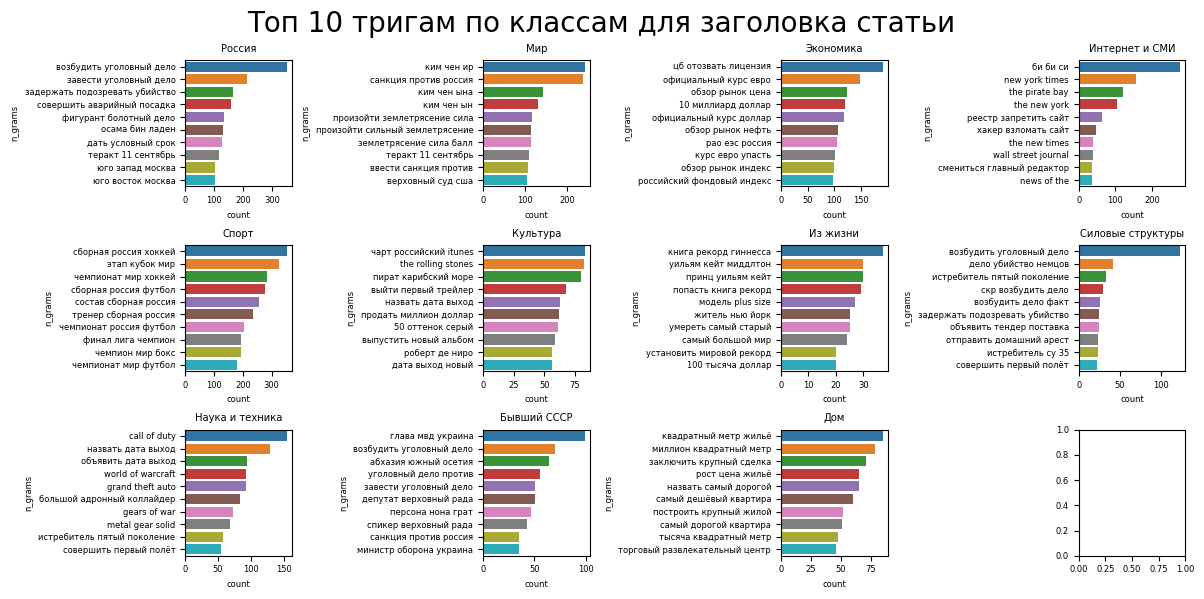

In [ ]:
plot_n_gam(n_gram=3, col='title', title='Топ 10 тригам по классам для заголовка статьи')

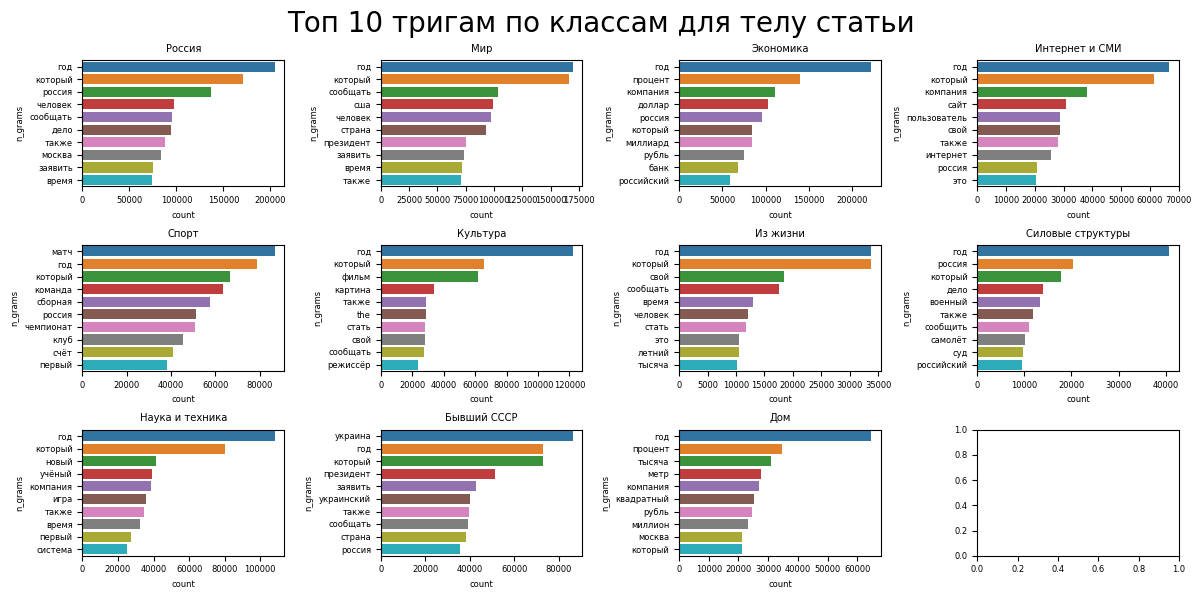

In [ ]:
plot_n_gam(n_gram=1, col='text', title='Топ 10 тригам по классам для телу статьи')

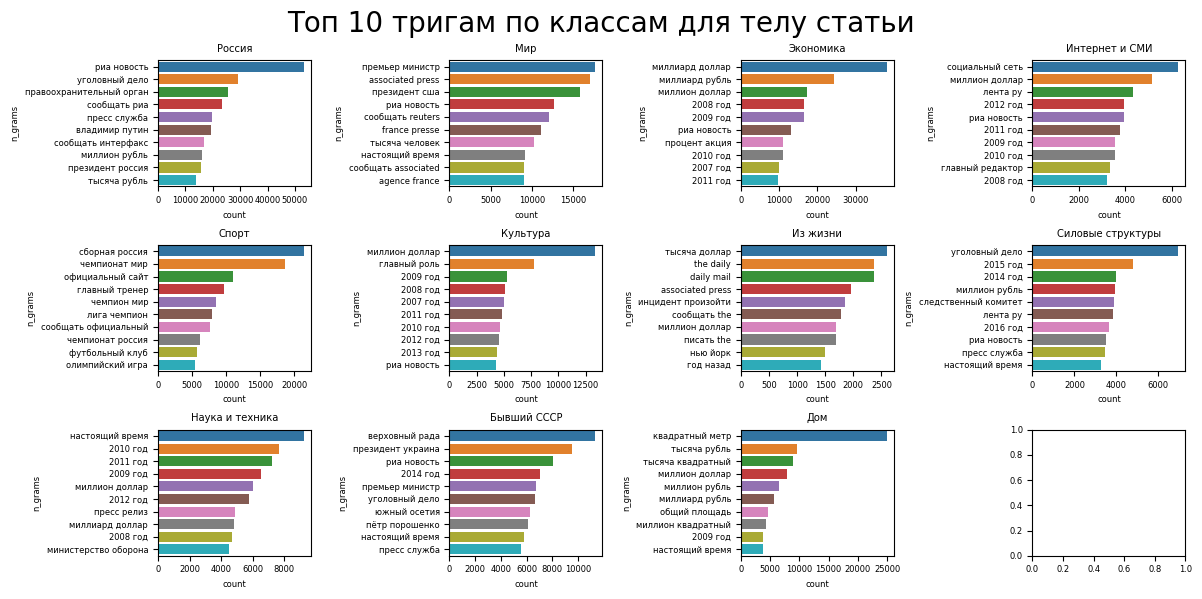

In [ ]:
plot_n_gam(n_gram=2, col='text', title='Топ 10 тригам по классам для телу статьи')

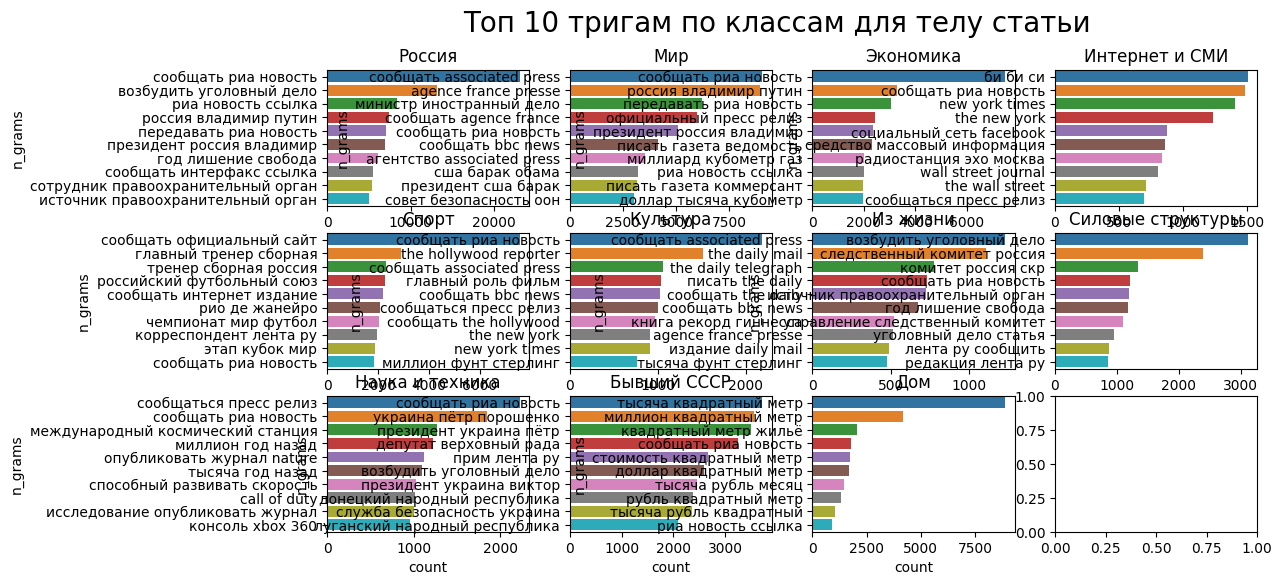

In [ ]:
plot_n_gam(n_gram=3, col='text', title='Топ 10 тригам по классам для телу статьи')

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharey=False)
axs = axs.flatten()
for ind, cls in enumerate(classes):
    ax = axs[ind]
    cv = CountVectorizer(ngram_range=(3, 3))
    n_grams = cv.fit_transform(df.loc[df['topic']==cls, 'title'])
    data = {'count':n_grams.sum(axis=0).tolist()[0], 'n_grams': [i[0] for i in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]}
    ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
    ax.set_title(cls)
    sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
fig.suptitle('Топ 10 биграм по классам для заголовка статьи', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
df.loc[df['topic']==cls, 'title']

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(12, 3))
# for ind, ax in enumerate(axs):
#     cv = CountVectorizer(ngram_range=(ind + 1, ind + 1))
#     n_grams = cv.fit_transform(df['text'])
#     data = {'count': n_grams.sum(axis=0).tolist()[0], 'n_grams': [i[0] for i in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]}
#     ngram_freq = pd.DataFrame(data).sort_values('count', ascending=False)
#     sns.barplot(x=ngram_freq['count'][:10], y=ngram_freq['n_grams'][:10], ax=ax)
# fig.suptitle('Топ 10 1-2-3 грам для тела статьи', fontsize=20)

# plt.tight_layout()
# plt.show()

In [ ]:
def plot_cm(y_true, y_pred, class_name):
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_name))), normalize='true' )
    tick_labels = class_name
    figsize = (8,8)
    ticks_size = 9
    fontsize_ax = 9
    fontsize_title = 12
    annotation_size = 8
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix', fontsize=fontsize_title)
    hmap = sns.heatmap(
        cm,
        ax=ax,
        annot=True,
        square=True,
        fmt='.1%',
        cmap='GnBu',
        cbar=False,
        annot_kws={'size':str(annotation_size)},
        xticklabels=tick_labels,
        yticklabels=tick_labels
    )
    plt.ylabel('Actual', fontsize=fontsize_ax)
    plt.xlabel('Predicted', fontsize=fontsize_ax)
    hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize=ticks_size, rotation=45)
    hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize=ticks_size)
    plt.show()

In [ ]:
X, y = df[['title', 'text']], df['topic']
enc = {v: k for k, v in enumerate(y.unique())}
dec = {v: k for k, v in enc.items()}
y = y.replace(enc)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
enc_title = TfidfVectorizer(min_df=5, max_features=100, max_df=0.99, ).fit(X_train['title'])
enc_body = TfidfVectorizer(min_df=5, max_features=1000, max_df=0.99).fit(X_train['text'])
X_train_enc = hstack((enc_title.transform(X_train['title']), enc_body.transform(X_train['text'])))
X_test_enc = hstack((enc_title.transform(X_test['title']), enc_body.transform(X_test['text'])))

## Random forest

In [ ]:
class_name = [dec[i] for i in range(len(dec.items()))]
rf = RandomForestClassifier( n_estimators=100, max_depth=8)
rf.fit(X_train_enc, y_train)
y_pred = rf.predict(X_test_enc)
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

           Россия       0.46      0.90      0.61     32088
              Мир       0.53      0.76      0.62     27324
        Экономика       0.73      0.65      0.69     15906
   Интернет и СМИ       0.75      0.00      0.01      8933
            Спорт       0.92      0.90      0.91     12883
         Культура       0.85      0.40      0.55     10759
         Из жизни       0.00      0.00      0.00      5521
Силовые структуры       0.00      0.00      0.00      3919
  Наука и техника       0.90      0.34      0.49     10627
      Бывший СССР       0.77      0.34      0.48     10680
              Дом       0.96      0.29      0.45      4347

         accuracy                           0.59    142987
        macro avg       0.62      0.42      0.44    142987
     weighted avg       0.63      0.59      0.54    142987



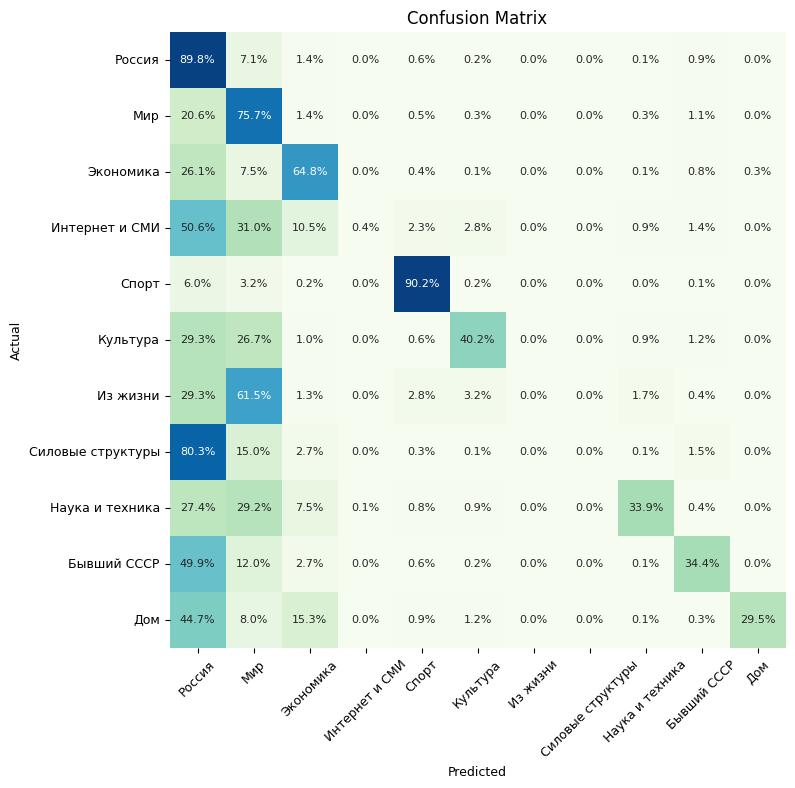

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(len(dec.items()))]
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

           Россия       0.76      0.81      0.78     32088
              Мир       0.77      0.81      0.79     27324
        Экономика       0.83      0.85      0.84     15906
   Интернет и СМИ       0.72      0.66      0.69      8933
            Спорт       0.96      0.95      0.96     12883
         Культура       0.84      0.82      0.83     10759
         Из жизни       0.62      0.53      0.57      5521
Силовые структуры       0.67      0.47      0.55      3919
  Наука и техника       0.81      0.81      0.81     10627
      Бывший СССР       0.78      0.74      0.76     10680
              Дом       0.84      0.77      0.80      4347

         accuracy                           0.79    142987
        macro avg       0.78      0.75      0.76    142987
     weighted avg       0.79      0.79      0.79    142987



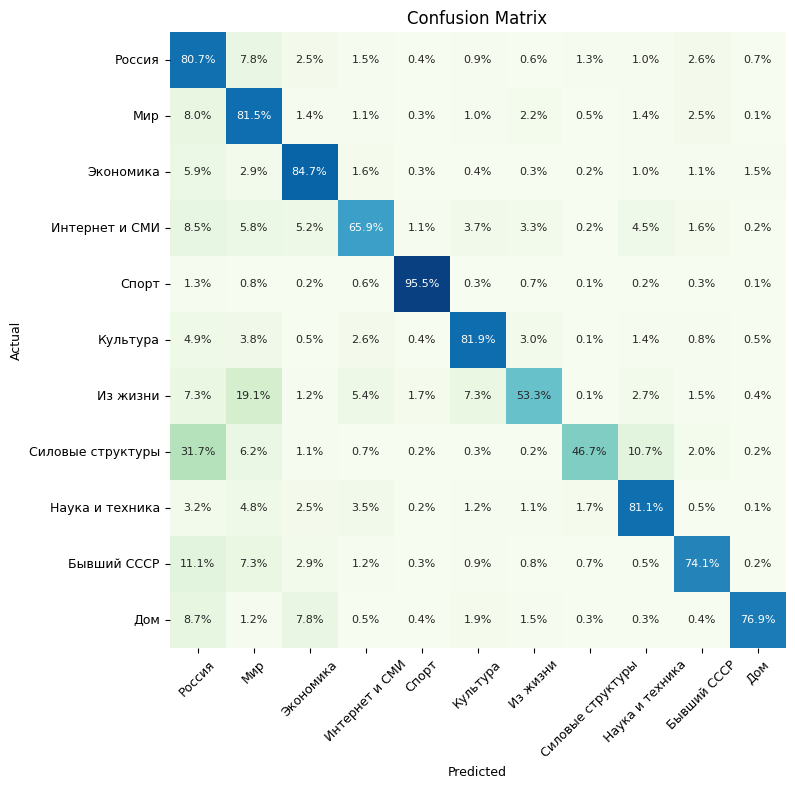

In [ ]:
plot_cm(y_test, y_pred, class_name)

# Удаляем спорные классы

In [ ]:
df_new = df[(df['topic']!='Россия') & (df['topic']!='Мир')]

In [ ]:
X, y = df_new[['title', 'text']], df_new['topic']
enc = {v: k for k, v in enumerate(y.unique())}
dec = {v: k for k, v in enc.items()}
y = y.replace(enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
enc_title = TfidfVectorizer(min_df=5, max_features=100, max_df=0.99).fit(X_train['title'])
enc_body = TfidfVectorizer(min_df=5, max_features=1000, max_df=0.99).fit(X_train['text'])

In [ ]:
X_train_enc = hstack((enc_title.transform(X_train['title']), enc_body.transform(X_train['text'])))
X_test_enc = hstack((enc_title.transform(X_test['title']), enc_body.transform(X_test['text'])))

## Random forest clear

In [ ]:
rf = RandomForestClassifier( n_estimators=100, max_depth=10)
rf.fit(X_train_enc, y_train)
y_pred = rf.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

        Экономика       0.56      0.94      0.70     15906
   Интернет и СМИ       0.75      0.28      0.41      8933
            Спорт       0.91      0.97      0.94     12883
         Культура       0.72      0.81      0.76     10759
         Из жизни       0.00      0.00      0.00      5521
Силовые структуры       0.50      0.00      0.00      3919
  Наука и техника       0.56      0.74      0.63     10627
      Бывший СССР       0.77      0.80      0.78     10680
              Дом       0.90      0.53      0.67      4347

         accuracy                           0.69     83575
        macro avg       0.63      0.56      0.54     83575
     weighted avg       0.66      0.69      0.64     83575



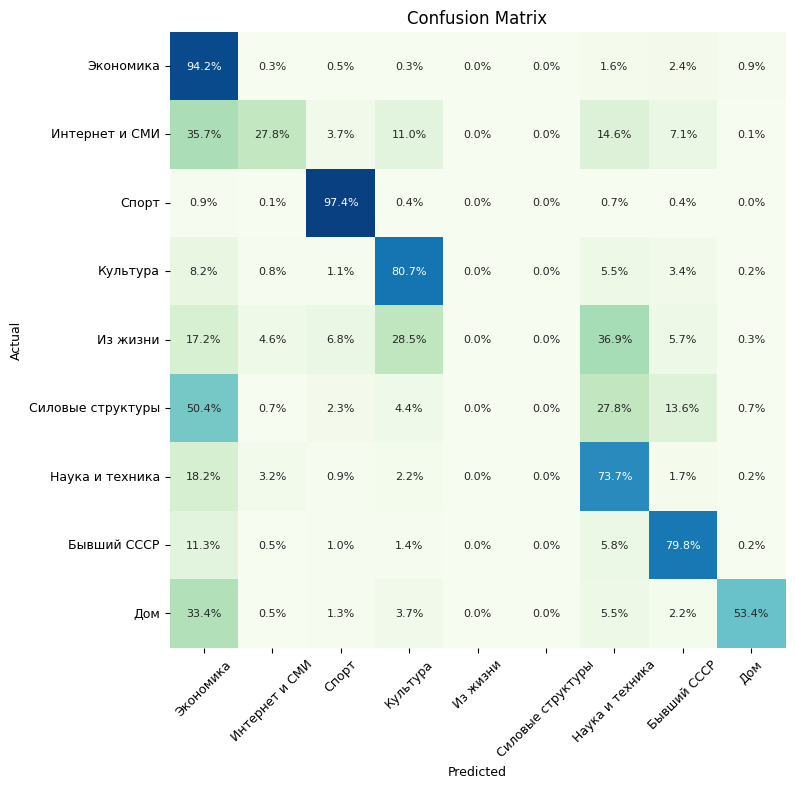

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Logistic regression clear

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

        Экономика       0.88      0.92      0.90     15906
   Интернет и СМИ       0.80      0.77      0.78      8933
            Спорт       0.97      0.97      0.97     12883
         Культура       0.89      0.90      0.89     10759
         Из жизни       0.75      0.73      0.74      5521
Силовые структуры       0.81      0.75      0.78      3919
  Наука и техника       0.86      0.86      0.86     10627
      Бывший СССР       0.88      0.89      0.88     10680
              Дом       0.88      0.83      0.86      4347

         accuracy                           0.87     83575
        macro avg       0.86      0.85      0.85     83575
     weighted avg       0.87      0.87      0.87     83575



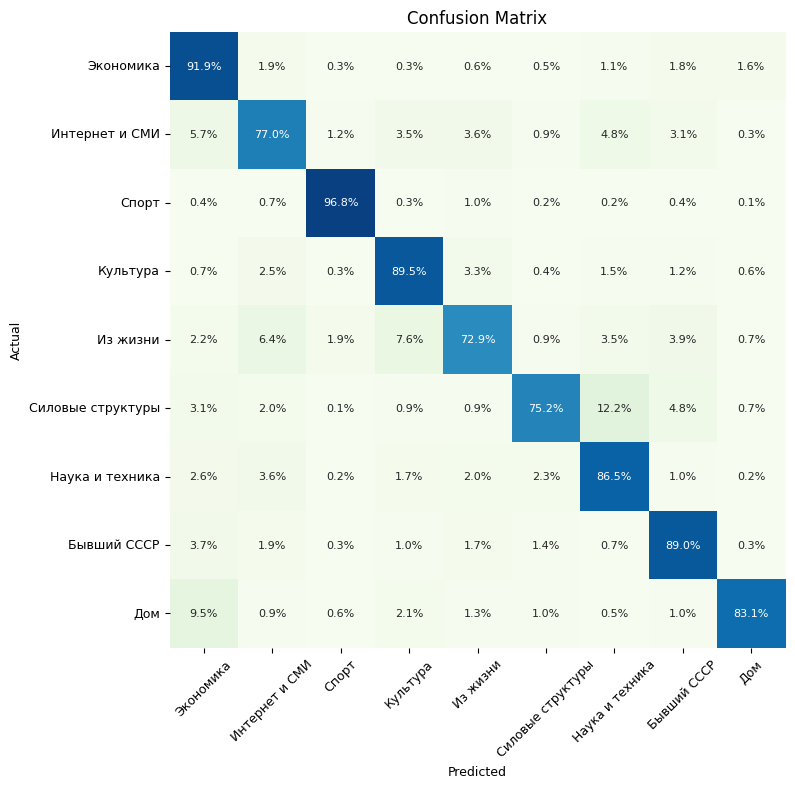

In [ ]:
plot_cm(y_test, y_pred, class_name)

## Один кодировщик

In [ ]:
enc_full = TfidfVectorizer(min_df=5, max_features=1100, max_df=0.99, ).fit(X_train['title'] + ' ' + X_train['text'])
X_train_enc = enc_full.transform(X_train['title'] + ' ' + X_train['text'])
X_test_enc = enc_full.transform(X_test['title'] + ' ' + X_test['text'])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred = lr.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

        Экономика       0.89      0.92      0.91     15906
   Интернет и СМИ       0.80      0.78      0.79      8933
            Спорт       0.97      0.97      0.97     12883
         Культура       0.89      0.90      0.90     10759
         Из жизни       0.75      0.73      0.74      5521
Силовые структуры       0.81      0.76      0.79      3919
  Наука и техника       0.86      0.87      0.86     10627
      Бывший СССР       0.89      0.90      0.89     10680
              Дом       0.88      0.84      0.86      4347

         accuracy                           0.88     83575
        macro avg       0.86      0.85      0.86     83575
     weighted avg       0.88      0.88      0.88     83575



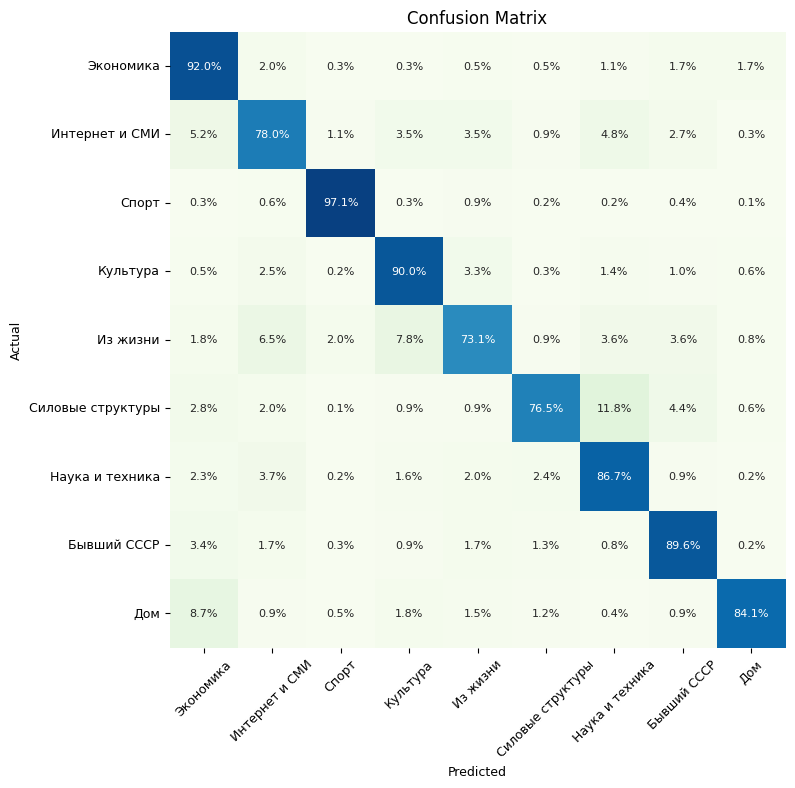

In [ ]:
plot_cm(y_test, y_pred, class_name)

In [ ]:
params = {'C': np.linspace(0, 2, 5)}
gscv = GridSearchCV(LogisticRegression(random_state=42), params, cv=5, scoring='accuracy')
gscv.fit(X_train_enc, y_train)
print(round(gscv.best_score_, 4))

0.8759


In [ ]:
y_pred = gscv.best_estimator_.predict(X_test_enc)
class_name = [dec[i] for i in range(9)]
print(classification_report(y_test, y_pred, target_names=class_name))

                   precision    recall  f1-score   support

        Экономика       0.89      0.92      0.91     15906
   Интернет и СМИ       0.80      0.78      0.79      8933
            Спорт       0.97      0.97      0.97     12883
         Культура       0.89      0.90      0.90     10759
         Из жизни       0.75      0.73      0.74      5521
Силовые структуры       0.81      0.77      0.79      3919
  Наука и техника       0.86      0.87      0.86     10627
      Бывший СССР       0.89      0.90      0.89     10680
              Дом       0.88      0.84      0.86      4347

         accuracy                           0.88     83575
        macro avg       0.86      0.85      0.86     83575
     weighted avg       0.88      0.88      0.88     83575



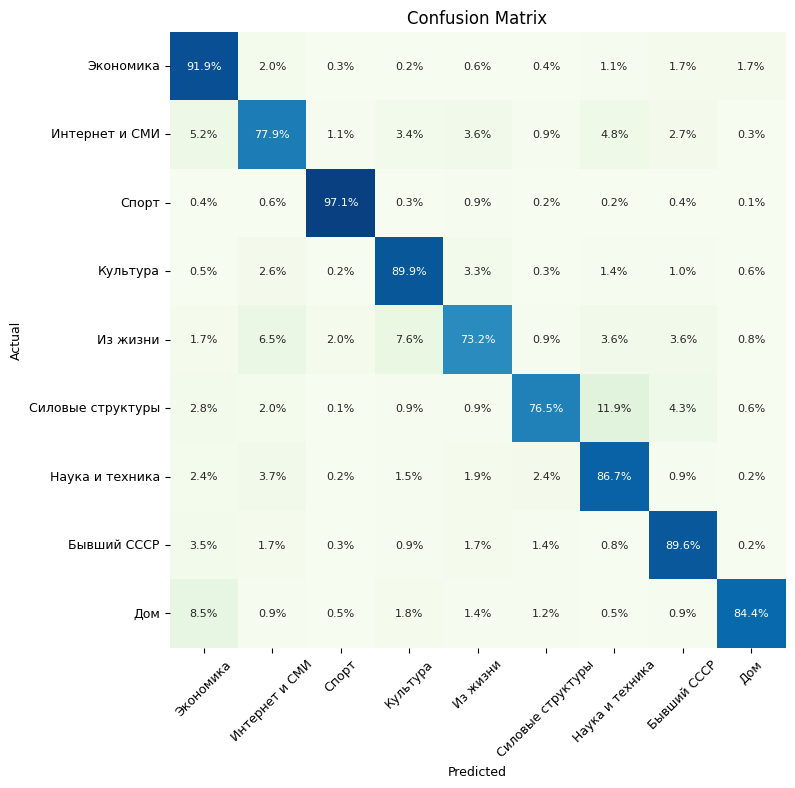

In [ ]:
plot_cm(y_test, y_pred, class_name)

In [ ]:
!mkdir bin
stopwords_ru = stopwords.words("russian")
with open('bin/lr.pkl', 'wb') as f:
    joblib.dump(lr, f)
with open('bin/sw.pkl', 'wb') as f:
    joblib.dump(stopwords_ru, f)
with open('bin/enc_full.pkl', 'wb') as f:
    joblib.dump(enc_full, f)
with open('bin/dec.pkl', 'wb') as f:
    joblib.dump(dec, f)

mkdir: cannot create directory ‘bin’: File exists


In [ ]:
with open('bin/lr.pkl', 'rb') as f:
    lr = joblib.load(f)
with open('bin/sw.pkl', 'rb') as f:
    stopwords_ru=joblib.load(f)
with open('bin/enc_full.pkl', 'rb') as f:
    enc_full = joblib.load(f)
with open('bin/dec.pkl', 'rb') as f:
    dec = joblib.load(f)

In [ ]:
!zip -r bin.zip bin

  adding: bin/ (stored 0%)
  adding: bin/enc_full.pkl (deflated 58%)
  adding: bin/sw.pkl (deflated 58%)
  adding: bin/dec.pkl (deflated 21%)
  adding: bin/lr.pkl (deflated 4%)


In [ ]:
!zip result_data.zip /content/data_temp.csv

  adding: content/data_temp.csv (deflated 77%)


# Тут начинается работа с ботом

In [ ]:
!git clone https://github.com/konstantinator/hse_project.git
with open('hse_project/bin/lr.pkl', 'rb') as f:
    lr = joblib.load(f)
with open('hse_project/bin/sw.pkl', 'rb') as f:
    stopwords_ru=joblib.load(f)
with open('hse_project/bin/enc_full.pkl', 'rb') as f:
    enc_full = joblib.load(f)
with open('hse_project/bin/dec.pkl', 'rb') as f:
    dec = joblib.load(f)

In [ ]:
df_source = pd.read_csv('final_dataset.csv' )
df_source_new = df_source[(df_source['topic']!='Россия') & (df_source['topic']!='Мир')]

In [ ]:
res = []
for topic in df_source_new['topic'].unique():
    res.append(df_source_new[df_source_new['topic']==topic].sample(100))

In [ ]:
df_base = pd.concat(res)
df_base = df_base.reset_index(drop=True)

In [ ]:
vectors = enc_full.transform(df_base['title'] + ' ' + df_base['text']).toarray()

In [ ]:
def get_sim_text(example):
    simili = cosine_similarity(vectors, enc_full.transform([example]).toarray())
    arg = simili.argmax()
    samp = df_base.iloc[arg,:]
    return f'Title: {samp.title} \n Body: {samp.text} \n class: {samp.topic}'

In [ ]:
ind=2
example = df_base['title'].values[ind] + ' ' + df_base['text'].values[ind]
print(get_sim_text(example))

Title: Росприроднадзор потребовал наказать подрядчика Sakhalin Energy 
 Body: Росприроднадзор завершил первый этап комплексной проверки Sakhalin Energy. По его итогам ведомство Олега Митволя направило в Генпрокуратуру письмо с просьбой проверить действия генподрядчика прокладки берегового трубопровода в рамках проекта "Сахалин-2". По данным Росприроднадзора, из-за подготовки для строительства трубы на сопках развиваются оползневые проекты, пишут "Ведомости". Генподрядчиком строительства выступает Сварочно-монтажный трест. Росприроднадзор считает, что он не устанавливал инженерные противоэрозийные и защитные сооружения. Кроме того, ведомство Олега Митволя выявило на проект "Сахалин-2" нарушение сроков сдачи в надзорные органы отчетов, а также сброс вод с превышением содержания нефтепродуктов с платформы "Моликпак", сказано в официальном пресс-релизе Росприроднадзора. Нарушение законодательства грозит Sakhalin Energy отвызом лицензии на водопользование, пишет "Время новостей". Без нее ко

In [ ]:
df_base.iloc[2,:]

title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# !rm -rf hse_project

In [ ]:
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

def preprocess(text):
    return ' '.join([morph.normal_forms(i)[0] for i in re.sub(patterns, ' ', text.lower()).split() if i not in stopwords_ru])

In [ ]:
example = '''Some Tittle

Some body'''

In [ ]:
title_body = example
title_body = preprocess(title_body)
X_pred = enc_full.transform([title_body])
dec[lr.predict(X_pred)[0]]

'Из жизни'

In [ ]:
def predict(example):
    title_body = example
    title_body = preprocess(title_body)
    X_pred = enc_full.transform([title_body])
    return dec[lr.predict(X_pred)[0]]

In [ ]:
answer = predict(example)

In [ ]:
try:
    answer = predict(example)
except:
    answer = 'Error'

In [ ]:
answer

'Из жизни'

# Телеграм бот

### Простой синхронный бот

In [ ]:
# from aiogram import Bot, Dispatcher, types

# # заглушка
# class model:
#     def predict(text):
#         return text

# # Замените 'YOUR_BOT_TOKEN' на ваш API токен бота
# BOT_TOKEN = '6708563519:AAHaTh5VfMYpkCUu8gHsBkCxIBGaY8mfOLo'

# bot = Bot(token=BOT_TOKEN)
# dp = Dispatcher(bot)

# # Обработчик команды /start
# @dp.message_handler(commands=['start'])
# async def start(message: types.Message):
#     await message.reply("Hello fellas, I am ready to analyse your news!")

# # Обработчик текстовых сообщений
# @dp.message_handler()
# async def text_handler(message: types.Message):
#     user_text = message.text
#     # Получение ответа от модели
#     model_response = model.predict(user_text)
#     await message.answer(model_response)

# # Запускаем бота
# if __name__ == '__main__':
#     executor.start_polling(dp, skip_updates=True)

## Асинхронный бот

In [ ]:
def predict_lr(sample):
    title, body = sample.split('\n\n')
    title, body = preprocess(title), preprocess(body)
    X_pred = hstack((enc_title.transform([title]), enc_body.transform([body])))
    return dec[lr.predict(X_pred)[0]]
def predict_rf(sample):
    title, body = sample.split('\n\n')
    title, body = preprocess(title), preprocess(body)
    X_pred = hstack((enc_title.transform([title]), enc_body.transform([body])))
    return dec[rf.predict(X_pred)[0]]

Установка библиотеки

Импорты

In [ ]:
import asyncio
import logging
from aiogram import Bot, Dispatcher, types, Router
from aiogram.filters.command import Command
from aiogram import F
from aiogram.types import Message
from aiogram.filters import Command
from aiogram.enums import ParseMode
from aiogram import html
from aiogram.filters import Command
from aiogram.types import ReplyKeyboardMarkup
from aiogram.utils.keyboard import ReplyKeyboardBuilder
from aiogram.types import Message, ReplyKeyboardRemove
from aiogram.filters import Command, StateFilter
from aiogram.fsm.context import FSMContext
from aiogram.fsm.state import StatesGroup, State
from aiogram.fsm.state import default_state

Возможные состояния

In [ ]:
class BotStates(StatesGroup):
    choosing_task_state = State()                 # Выбор задачи
    choosing_model_state = State()                # Выбор модели
    logreg_state = State()                        # Вставка новости для лог рег
    randomforest_state = State()                  # Вставка новости для randomForest
    do_you_want_to_percenteges_state = State()    # После нахождения результатов можно вывести уверенность бота в своем ответе
    index_ml_state = State()                      # Вставка новости для поиска похожей

keyboards/keyboard_for_start.py

In [ ]:
def get_keyBoard_for_start() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Отнеси мою новость к нужной теме")
    kb.button(text="Найди новость похожую на мою")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

keyboards/keyboard_for_back_to_menu.py

In [ ]:
def get_keyBoard_for_back_to_menu() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text = "Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

handlers/start.py

In [ ]:
# from keyboards/keyboard_for_start.py import get_keyBoard_for_start

router = Router()

# @router.message(StateFilter(None), Command("start"))
@router.message(Command("start"))
async def cmd_start(message: Message, state: FSMContext):
    await state.clear()
    await message.answer(
        text="Что Вы хотите сделать?",
        reply_markup = get_keyBoard_for_start()
    )
    # Устанавливаем пользователю состояние "выбирает задачу"
    await state.set_state(BotStates.choosing_task_state)

keyboards/keyboard_for_choosing_models.py

In [ ]:
def keyboard_for_choosing_models() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Логистическая регрессия")
    kb.button(text="Random Forest")
    kb.button(text="Назад")
    kb.adjust(1)
    return kb.as_markup(resize_keyboard=True)

handlers/back_to_menu.py

In [ ]:
@router.message(F.text.lower() == "назад")
async def back_to_menue(message: Message, state: FSMContext):
    await message.answer(
        text = "главное меню",
        reply_markup = get_keyBoard_for_start()
    )
    await state.set_state(BotStates.choosing_task_state)

handlers/main_menu.py

In [ ]:
# from keyboards/keyboard_for_choosing_models.py import keyboard_for_choosing_models

# Роутер для обработки задания отнеси к нужной теме
@router.message(
    BotStates.choosing_task_state,
    F.text.lower() == "отнеси мою новость к нужной теме"
)
async def task_chosen_topic(message: Message, state: FSMContext):
    await message.answer(
        text = "Теперь, пожалуйста, выберите модель",
        reply_markup = keyboard_for_choosing_models()
    )
    await state.set_state(BotStates.choosing_model_state)

# Роутер для обработки некорректных вводов
@router.message(StateFilter("BotStates:choosing_task_state"),
                F.text.lower() == "отнеси мою новость к нужной теме",
                F.text.lower() != "найди новость похожую на мою")
async def task_chosen_incorrectly(message: Message):
    await message.answer(
        text = "Некорректный ввод.\n\n"
             "Пожалуйста, выберите одно из списка ниже:",
        reply_markup = get_keyBoard_for_start()
    )

keyboard/get_keyBoard_for_confidence

In [ ]:
def get_keyBoard_for_confidence() -> ReplyKeyboardMarkup:
    kb = ReplyKeyboardBuilder()
    kb.button(text="Покажи процент уверенности модели")
    kb.button(text="Назад")
    kb.adjust(2)
    return kb.as_markup(resize_keyboard=True)

handlers/logreg.py

In [ ]:
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "логистическая регрессия")
async def log_reg_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали логистическую регрессию! Теперь вставьте сюда текст Вашей новости\n\n"
        "Some Tittle\n\nSome text'''",
        reply_markup = get_keyBoard_for_back_to_menu()
    )
    await state.set_state(BotStates.logreg_state)

handlers/text_analysis_by_logreg.py

In [ ]:
@router.message(BotStates.logreg_state)
async def log_reg_answer(message: Message, state: FSMContext):
    # print(message.text.lower())
    await message.answer(
        text = predict_lr(message.text.lower()),
        reply_markup = get_keyBoard_for_confidence()
    )
    await state.set_state(BotStates.do_you_want_to_percenteges_state)

handlers/random_forest.py

In [ ]:
@router.message(BotStates.choosing_model_state,
                F.text.lower() == "random forest")
async def random_forest_chosen(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали random forest! Теперь вставьте сюда текст Вашей новости\n\n"
        "Some Tittle\n\nSome text'''",
        reply_markup = get_keyBoard_for_back_to_menu()
    )
    await state.set_state(BotStates.randomforest_state)

handlers/text_analysis_by_randomForesr.py

In [ ]:
@router.message(BotStates.randomforest_state)
async def raandom_forest_answer(message: Message, state: FSMContext):
    await message.answer(
        text = predict_rf(message.text.lower()),
        reply_markup = get_keyBoard_for_confidence()
    )
    await state.set_state(BotStates.do_you_want_to_percenteges_state)

handlers/incorrect model.py

In [ ]:
# Роутер для обработки некорректных вводов
@router.message(BotStates.choosing_model_state,
                F.text.lower() != "назад")
async def task_chosen_incorrectly(message: Message, state: FSMContext):
    await message.answer(
        text = "Некорректный ввод.\n\n"
             "Пожалуйста, выберите модель из списка ниже:",
        reply_markup = keyboard_for_choosing_models()
    )

handlers/model_confidence.py

In [ ]:
# Роутер для обработки некорректных вводов
@router.message(BotStates.do_you_want_to_percenteges_state,
                F.text.lower() == "покажи процент уверенности модели")
async def task_chosen_incorrectly(message: Message):
    await message.answer(
        text = "тут надо допилить модель",
        reply_markup = get_keyBoard_for_back_to_menu()
    )

handlers/index_ml.py

In [ ]:
# Роутер для обработки задания найди похожую
@router.message(
    BotStates.choosing_task_state,
    F.text.lower() == "найди новость похожую на мою"
)
async def task_chosen_index(message: Message, state: FSMContext):
    await message.answer(
        text = "Поздравляю, вы выбрали поиск похожей новости! Теперь вставьте сюда текст Вашей новости\n\n"
        "Some Tittle\n\nSome text'''",
        reply_markup = get_keyBoard_for_back_to_menu()
    )
    await state.set_state(BotStates.index_ml_state)

bot.py - Точка входа в приложение

In [ ]:
# Включаем логирование, чтобы не пропустить важные сообщения
logging.basicConfig(level=logging.INFO)

# Запуск бота
async def main():
    bot = Bot(token="6708563519:AAHaTh5VfMYpkCUu8gHsBkCxIBGaY8mfOLo")
    dp = Dispatcher()
    dp.include_router(router)
    # Запускаем бота и пропускаем все накопленные входящие
    # Да, этот метод можно вызвать даже если у вас поллинг
    await bot.delete_webhook(drop_pending_updates=True)
    await dp.start_polling(bot)

await main()

# Если код запускакется не в колабе или юпитере
# if __name__ == "__main__":
#     asyncio.run(main())

some tittle

some text'''42


In [ ]:
2+2

4